In [11]:
from collections import Counter
import numpy as np

### Euclidean Distance Function

In [12]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1)-np.array(point2))**2))

### KNN Prediction Function

In [16]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

### Training Data, Labels and Test Point

In [17]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

### Prediction

In [18]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


# KNN using sklearn

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('breast-cancer.csv') 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# Separate dependent and independent variables
y = df['diagnosis'] 
X = df.drop('diagnosis', axis = 1) 
X = X.drop('id', axis = 1) 

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [31]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9447236180904522, 0.9298245614035088]
3 : [0.9522613065326633, 0.9181286549707602]
4 : [0.9447236180904522, 0.9298245614035088]
5 : [0.9396984924623115, 0.9473684210526315]
6 : [0.9371859296482412, 0.9473684210526315]
7 : [0.9371859296482412, 0.9532163742690059]
8 : [0.9321608040201005, 0.9532163742690059]
9 : [0.9321608040201005, 0.9590643274853801]
10 : [0.9321608040201005, 0.9649122807017544]
11 : [0.9346733668341709, 0.9649122807017544]
12 : [0.9321608040201005, 0.9649122807017544]
13 : [0.9296482412060302, 0.9649122807017544]
14 : [0.9296482412060302, 0.9649122807017544]
15 : [0.9321608040201005, 0.9649122807017544]
16 : [0.9271356783919598, 0.9649122807017544]
17 : [0.9321608040201005, 0.9649122807017544]
18 : [0.9221105527638191, 0.9649122807017544]
19 : [0.9246231155778895, 0.9649122807017544]
20 : [0.9170854271356784, 0.9649122807017544]


We now try to find the optimum value for 'k' ie the number of nearest neighbors.

[Text(0.5, 0, 'Values of k'), Text(0, 0.5, 'Training Score')]

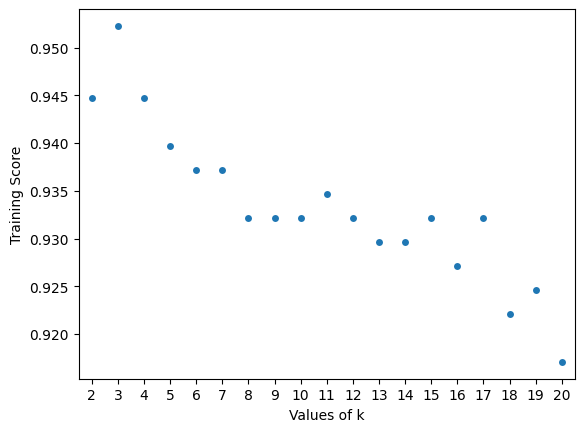

In [37]:
ax = sns.stripplot(x=K, y=training) 
ax.set(xlabel='Values of k', ylabel='Training Score')

[Text(0.5, 0, 'Values of k'), Text(0, 0.5, 'Test Score')]

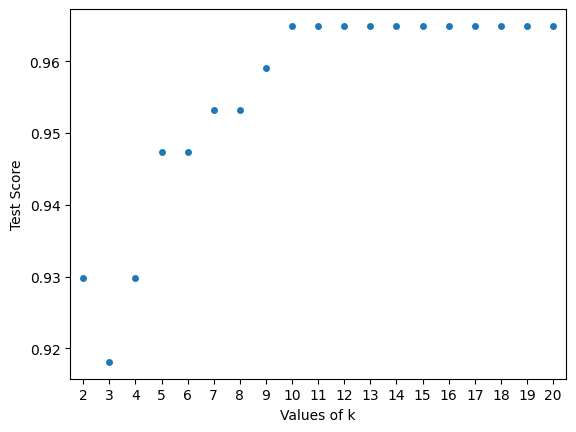

In [38]:
ax = sns.stripplot(x=K, y=test)
ax.set(xlabel='Values of k', ylabel='Test Score')

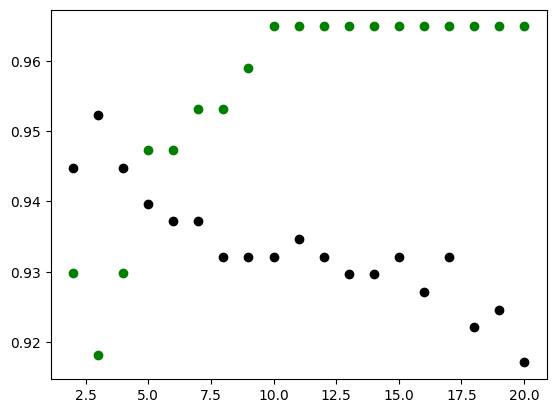

In [39]:
plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')

From the above scatter plot, we can come to the conclusion that the optimum value of k will be around 5.